In [24]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../src'))

# Import the necessary modules
from data_preprocessing import preprocess_data

import pandas as pd

# Data Loading
train_data = pd.read_csv('../data/raw/Train.csv')
test_data = pd.read_csv('../data/raw/Test.csv')

# Display the first few rows of the raw data
print("Raw Train Data:")
print(train_data.head())

# Data Preprocessing
processed_train_data = preprocess_data(train_data)
processed_test_data = preprocess_data(test_data)

# Display the first few rows of the processed data
print("\nProcessed Train Data:")
print(processed_train_data.head())


Raw Train Data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium   

d:\Github_projects\bigmart-sales-analysis-prediction\BigMart-Sales-Prediction\src\data_preprocessing.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
d:\Github_projects\bigmart-sales-analysis-prediction\BigMart-Sales-Prediction\src\data_preprocessing.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

In [26]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [25]:
processed_train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,-0.841872,-0.970732,Dairy,1.747454,OUT049,1999,Supermarket Type1,3735.1380,False,True,False,False,False,True,False
1,DRC01,-1.641706,-0.908111,Soft Drinks,-1.489023,OUT018,2009,Supermarket Type2,443.4228,True,True,False,False,True,False,False
2,FDN15,1.098554,-0.956917,Meat,0.010040,OUT049,1999,Supermarket Type1,2097.2700,False,True,False,False,False,True,False
3,FDX07,1.500838,-1.281758,Fruits and Vegetables,0.660050,OUT010,1998,Grocery Store,732.3800,True,True,False,False,True,True,False
4,NCD19,-0.929428,-1.281758,Household,-1.399220,OUT013,1987,Supermarket Type1,994.7052,False,False,False,False,True,False,True


2. Data Visualization

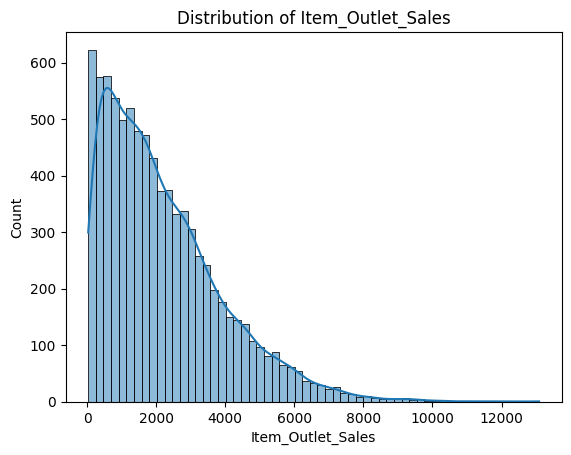

ValueError: could not convert string to float: 'FDA15'

<Figure size 1200x800 with 0 Axes>

In [23]:
# Import the visualization functions
from visualization import plot_target_distribution, plot_correlation_matrix

# Set the correct target column name
target_column = 'Item_Outlet_Sales'

# Exploratory Data Analysis (EDA)
plot_target_distribution(processed_train_data, target_column)
plot_correlation_matrix(processed_train_data)


3. Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Model Building
X = processed_train_data.drop(target_column, axis=1)
y = processed_train_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


4. Saving the Model

In [ ]:
import joblib

# Save the processed data to CSV files
processed_train_data.to_csv('../data/processed/processed_train.csv', index=False)
processed_test_data.to_csv('../data/processed/processed_test.csv', index=False)

# Save the trained model to a file
joblib.dump(model, '../models/random_forest_model.pkl')

print("Model saved to ../models/random_forest_model.pkl")
